In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\lasra\Desktop\olympics\Olympic paris\medals.csv")

In [3]:
# Group by discipline and count the number of medals in each discipline
medals_per_discipline = data.groupby('discipline').size().reset_index(name='medal_count')

medals_per_discipline.sort_values(by='medal_count', ascending=False)


,discipline,medal_count
4,Athletics,142
34,Swimming,105
43,Wrestling,72
24,Judo,60
8,Boxing,52
30,Shooting,45
2,Artistic Gymnastics,43
27,Rowing,42
19,Fencing,36
16,Cycling Track,36


In [4]:
# Filter the dataset to include only gold medals
gold_medals = data[data['medal_type'] == 'Gold Medal']

# Group by discipline and count the number of gold medals in each discipline
gold_medals_per_discipline = gold_medals.groupby('discipline').size().reset_index(name='gold_medal_count')

gold_medals_per_discipline.sort_values(by='gold_medal_count', ascending=False)

,discipline,gold_medal_count
4,Athletics,47
34,Swimming,35
43,Wrestling,18
24,Judo,15
30,Shooting,15
27,Rowing,14
2,Artistic Gymnastics,14
8,Boxing,13
19,Fencing,12
16,Cycling Track,12


In [5]:
# Merge the two dataframes on the 'discipline' column
combined_medals = pd.merge(medals_per_discipline, gold_medals_per_discipline, on='discipline', how='left')

# Fill any NaN values in the gold_medal_count column with 0 (in case some disciplines have no gold medals)
combined_medals['gold_medal_count'] = combined_medals['gold_medal_count'].fillna(0)

# Sort by the total number of medals in descending order
combined_medals = combined_medals.sort_values(by='medal_count', ascending=False).reset_index(drop=True)


In [6]:
combined_medals

,discipline,medal_count,gold_medal_count
0,Athletics,142,47
1,Swimming,105,35
2,Wrestling,72,18
3,Judo,60,15
4,Boxing,52,13
5,Shooting,45,15
6,Artistic Gymnastics,43,14
7,Rowing,42,14
8,Fencing,36,12
9,Cycling Track,36,12


In [7]:
total_medal_count = combined_medals['medal_count'].sum()

In [8]:
total_gold_count= combined_medals['gold_medal_count'].sum()

In [9]:
combined_medals['share_from_total_medal(%)'] = round(combined_medals['medal_count']/total_medal_count,2)*100

In [10]:
combined_medals ['share_from_total_gold_medal(%)'] = round(combined_medals['gold_medal_count']/total_gold_count,2)*100

In [11]:
combined_medals

,discipline,medal_count,gold_medal_count,share_from_total_medal(%),share_from_total_gold_medal(%)
0,Athletics,142,47,14.0,14.0
1,Swimming,105,35,10.0,11.0
2,Wrestling,72,18,7.0,6.0
3,Judo,60,15,6.0,5.0
4,Boxing,52,13,5.0,4.0
5,Shooting,45,15,4.0,5.0
6,Artistic Gymnastics,43,14,4.0,4.0
7,Rowing,42,14,4.0,4.0
8,Fencing,36,12,3.0,4.0
9,Cycling Track,36,12,3.0,4.0


# Export the combined dataframe to an Excel file
output_file_path = r'C:\Users\lasra\Desktop\olympics\Olympic paris\Where can the main gold mines be found/Where can the main gold mines be found.xlsx'
combined_medals.to_excel(output_file_path, index=False)

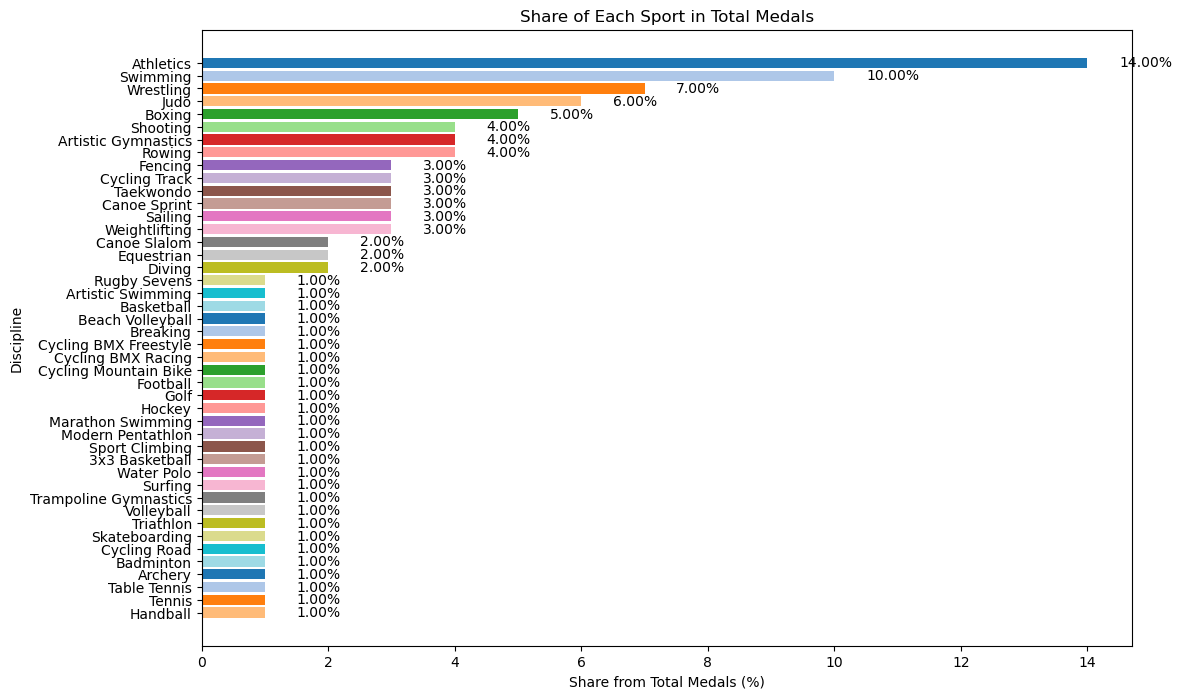

In [16]:
# Sorting the DataFrame by 'share_from_total_medal(%)' in descending order
combined_medals_sorted_medals = combined_medals.sort_values(by='share_from_total_medal(%)', ascending=False)

# Plotting the share of each sport in terms of total medals
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors  # Using a colormap to assign unique colors
bars = plt.barh(combined_medals_sorted_medals['discipline'], 
                combined_medals_sorted_medals['share_from_total_medal(%)'], 
                color=colors[:len(combined_medals_sorted_medals)])

plt.xlabel('Share from Total Medals (%)')
plt.ylabel('Discipline')
plt.title('Share of Each Sport in Total Medals')
plt.gca().invert_yaxis()  # To show the highest value at the top

# Adding labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', 
             va='center')

plt.show()

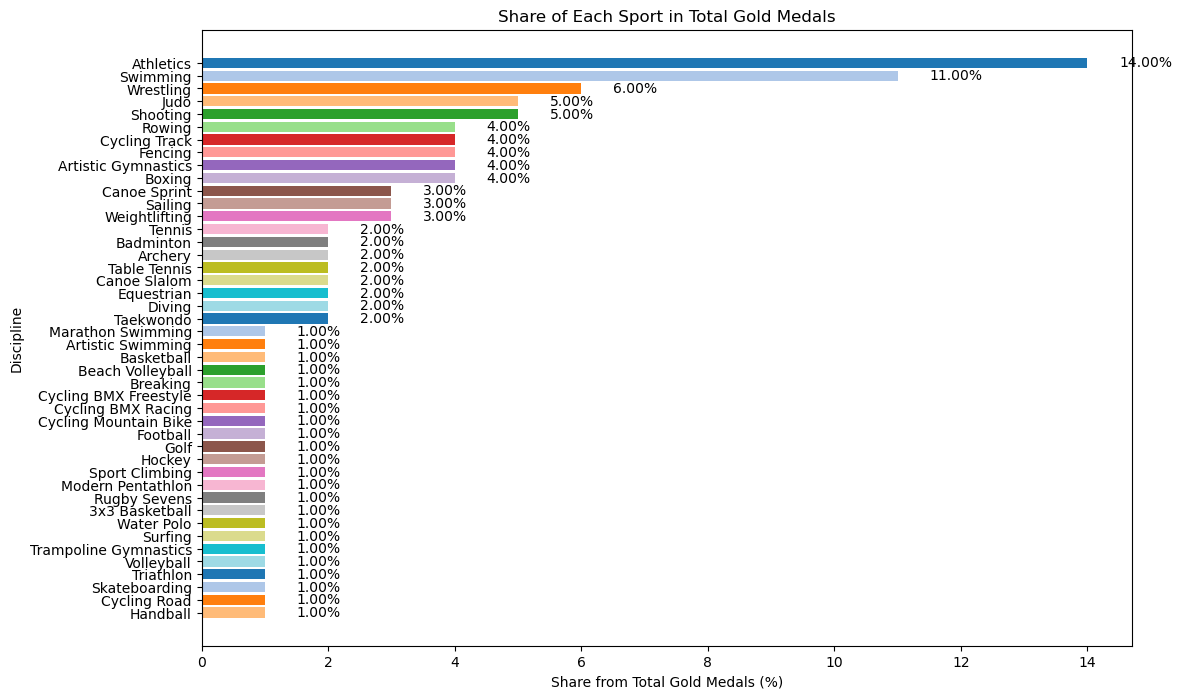

In [17]:

# Sorting the DataFrame by 'share_from_total_gold_medal(%)' in descending order
combined_medals_sorted_gold = combined_medals.sort_values(by='share_from_total_gold_medal(%)', ascending=False)

# Plotting the share of each sport in terms of gold medals
plt.figure(figsize=(12, 8))
bars = plt.barh(combined_medals_sorted_gold['discipline'], 
                combined_medals_sorted_gold['share_from_total_gold_medal(%)'], 
                color=colors[:len(combined_medals_sorted_gold)])

plt.xlabel('Share from Total Gold Medals (%)')
plt.ylabel('Discipline')
plt.title('Share of Each Sport in Total Gold Medals')
plt.gca().invert_yaxis()  # To show the highest value at the top

# Adding labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', 
             va='center')

plt.show()